In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

bc = datasets.load_breast_cancer()

X = bc.data
y = bc.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1,
                                                    stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [4]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [6]:
y_pred = svc.predict(X_test)

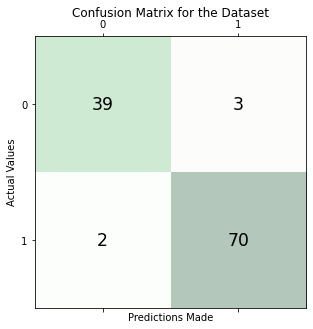

In [7]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions Made')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for the Dataset')
plt.show()

In [8]:
print('Precision for the model is : %.3f' % precision_score(y_test, y_pred))
print('Recall of the model is : %.3f' % recall_score(y_test, y_pred))
print('Accuracy of the model is : %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score for the model is : %.3f' % f1_score(y_test, y_pred))

Precision for the model is : 0.959
Recall of the model is : 0.972
Accuracy of the model is : 0.956
F1 Score for the model is : 0.966
